In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint
%matplotlib inline

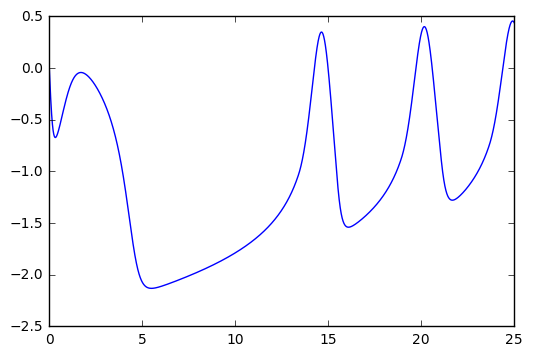

In [84]:
# Time
t_start = 0.
t_end = 25.
N = 1000*(t_end-t_start)
dt = float(t_end - t_start)/N
t = [t_start + n*dt for n in range(N)]

# Parameters
x0 = -1.6
y0 = 1.
tau0 = 2857.
tau1 = 1.
tau2 = 10.
Irest1 = 3.1
Irest2 = 0.45
gamma = 0.01

# Initial conditions
z_0 = 3.
x1_0 = 0.
y1_0 = -5.
x2_0 = 0.
y2_0 = 0.

z = np.zeros(N); z[0] = z_0
x1 = np.zeros(N); x1[0] = x1_0
y1 = np.zeros(N); y1[0] = y1_0
x2 = np.zeros(N); x2[0] = x2_0
y2 = np.zeros(N); y2[0] = y2_0

def f1_c(x1,x2,z):
    return (x1**3 - 3.*x1**2) if (x1 < 0) else ((x2 - 0.6*((z-4)**2))*x1)
def f2_c(x2):
    return 0 if x2 < -0.25 else 6*(x2 + 0.25)
def g_c(x1,t):
#     return 0
    return sum([np.exp(-gamma*(t[-1]-tau))*x1_tau for tau,x1_tau in zip(t,x1)])*dt
    
def x1_c(x1,y1,z,x2,y2,f1,f2,g):
    return y1 - f1 - z + Irest1
def y1_c(x1,y1,z,x2,y2,f1,f2,g):
    return y0 - (5*x1**2) - y1
def z_c(x1,y1,z,x2,y2,f1,f2,g):
    return (1/tau0)*(4*(x1-x0) - z)
def x2_c(x1,y1,z,x2,y2,f1,f2,g):
    return -y2 + x2 - x2**3 + Irest2 + 0.002*g -.3*(z-3.5)
def y2_c(x1,y1,z,x2,y2,f1,f2,g):
    return (1/tau2)*(-y2 + f2)


for n in range(N-1):
    f1 = f1_c(x1[n],x2[n],z[n])
    f2 = f2_c(x2[n])
    g = g_c(x1[0:n],t[0:n])
#     print('n=' + str(n) + ', g=' + str(g))
    x1[n+1] = x1[n] + dt*x1_c(x1[n],y1[n],z[n],x2[n],y2[n],f1,f2,g)
    y1[n+1] = y1[n] + dt*y1_c(x1[n],y1[n],z[n],x2[n],y2[n],f1,f2,g)
    z[n+1] = z[n] + dt*z_c(x1[n],y1[n],z[n],x2[n],y2[n],f1,f2,g)
    x2[n+1] = x2[n] + dt*x2_c(x1[n],y1[n],z[n],x2[n],y2[n],f1,f2,g)
    y2[n+1] = y2[n] + dt*y2_c(x1[n],y1[n],z[n],x2[n],y2[n],f1,f2,g)
    
plt.plot(t,[xx1 + xx2 for xx1,xx2 in zip(x1,x2)])
# plt.plot()
plt.show()


In [3]:
# Time
t_start = 0.
t_end = 1500.
N = 500*(t_end-t_start)
dt = float(t_end - t_start)/N
tspan = np.linspace(t_start,t_end,N)

# Parameters
x0, y0 = -1.6, 1.
tau0, tau1, tau2 = 2857., 1., 10.
Irest1, Irest2 = 3.1, 0.45
gamma = 0.01

def f1(x):
    return(x[0]**3 - 3.*x[0]**2) if (x[0] < 0.) else ( (x[3] - 0.6*(x[2]-4.)**2)*x[0] )
def f2(x):
    return 0 if x[3] < -0.25 else 6*(x[3] + 0.25)

ic = np.array([0.,-5.,3.,0.,0.,0.])

def f(x,t):
    """
    x = [0=x1,1=y1,2=z,3=x2,4=y2,5=g]
    """
    return np.array([
        x[1] - f1(x) - x[2] + Irest1,
        y0 - (5*x[0]**2) - x[1],
        (1/tau0)*(4*(x[0]-x0) - x[2]),
        -x[4] + x[3] - x[3]**3 + Irest2 + 2.*x[5] -.3*(x[2]-3.5), # note difference in x[5] coefficient
        (1/tau2)*(-x[4] + f2(x)),
        -gamma*(x[5] - 0.1*x[0])])
def G(x,t):
#     a = [0.025, 0.0, 0., .25, 0., 0.]
    a = [0., 0.0, 0., 0., 0., 0.]
#     a = list(np.zeros(6))
    return np.diag(a)

result = sdeint.itoEuler(f, G, ic, tspan)


dt =  0.002


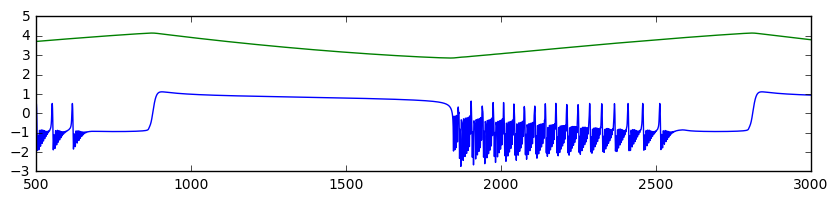

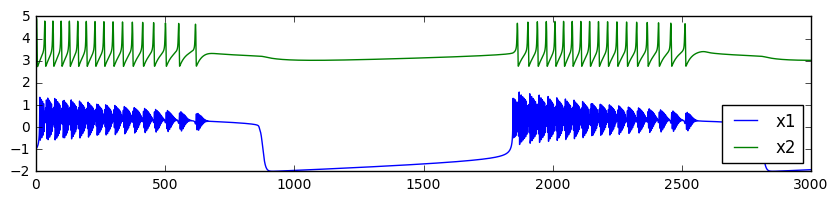

In [4]:
print('dt = ', dt)
plt.figure(figsize=(10,2))
plt.plot(tspan[250000:,],-result[250000:,0]+result[250000:,3])
# plt.plot(tspan,result[:,3])
plt.plot(tspan[250000:,],result[250000:,2])
# plt.plot(tspan,result[:,5]*10.)
plt.figure(figsize=(10,2))
# plt.plot(result[:,2],result[:,0])
plt.plot(tspan,result[:,0],label='x1')
plt.plot(tspan,result[:,3]+4,label='x2')
plt.legend(loc='lower right')
plt.show()

In [104]:
f1(ic)

-145.80000000000001

In [92]:
import numpy as np
import sdeint

A = np.array([[-0.5, -2.0],
              [ 2.0, -1.0]])

B = np.diag([0.5, 0.5]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 10.0, 10001)
x0 = np.array([3.0, 3.0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B

result = sdeint.itoint(f, G, x0, tspan)

In [101]:
A.dot(x0)

array([-7.5,  3. ])

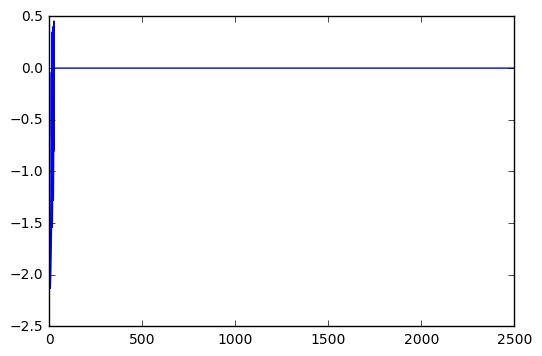

In [80]:
plt.plot(t,[xx1 + xx2 for xx1,xx2 in zip(x1,x2)])
# plt.plot()
plt.show()

In [40]:
assert (f1(-1,1,1) == -4.) & (f1(1,1,1) == (1-0.6*(-3)**2))
assert (f2(-1) == 0) & (f2(1) == 6*(1.25))

In [68]:
y1

array([ -5.00000000e+00,   1.00000000e+00,  -1.19050000e+02,
        -1.72751801e+05,  -3.78629511e+04])